In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('titanic_dataset.csv')

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data.drop('Cabin',axis=1,inplace=True)

In [7]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [8]:
d=data['Name'].str.split(',', expand=True)
d1=d[1].str.split('.', expand=True)
d2=d1.drop([1,2], axis=1)
d2

,0
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
...,...
886,Rev
887,Miss
888,Miss
889,Mr


In [9]:
data=pd.concat([data, d2], axis=1)
data= data.rename(columns={data.columns[-1]:'title'})
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Mr


In [10]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'title'],
      dtype='object')

In [11]:
df=data[['Survived','Pclass','title','Sex', 'Age', 'SibSp', 'Parch']]
df

,Survived,Pclass,title,Sex,Age,SibSp,Parch
0,0,3,Mr,male,22.0,1,0
1,1,1,Mrs,female,38.0,1,0
2,1,3,Miss,female,26.0,0,0
3,1,1,Mrs,female,35.0,1,0
4,0,3,Mr,male,35.0,0,0
...,...,...,...,...,...,...,...
886,0,2,Rev,male,27.0,0,0
887,1,1,Miss,female,19.0,0,0
888,0,3,Miss,female,NaN,1,2
889,1,1,Mr,male,26.0,0,0


In [12]:
df.isna().sum()

Survived      0
Pclass        0
title         0
Sex           0
Age         177
SibSp         0
Parch         0
dtype: int64

In [13]:
df.groupby('title')['Age'].mean()

title
 Capt            70.000000
 Col             58.000000
 Don             40.000000
 Dr              42.000000
 Jonkheer        38.000000
 Lady            48.000000
 Major           48.500000
 Master           4.574167
 Miss            21.773973
 Mlle            24.000000
 Mme             24.000000
 Mr              32.368090
 Mrs             35.898148
 Ms              28.000000
 Rev             43.166667
 Sir             49.000000
 the Countess    33.000000
Name: Age, dtype: float64

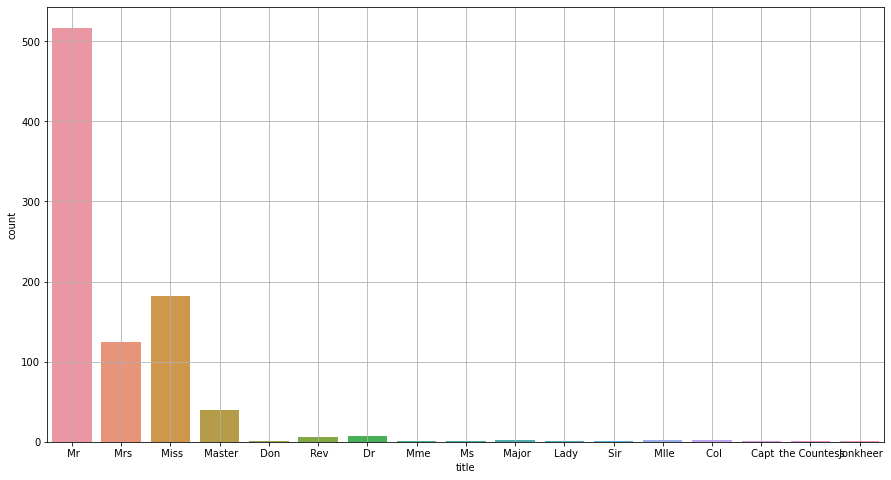

In [14]:
plt.figure(figsize=(15,8))

sns.countplot(df['title'])
plt.grid()

In [15]:
df['Age']=df['Age'].fillna(df.groupby('title')['Age'].transform('mean'))
df

,Survived,Pclass,title,Sex,Age,SibSp,Parch
0,0,3,Mr,male,22.000000,1,0
1,1,1,Mrs,female,38.000000,1,0
2,1,3,Miss,female,26.000000,0,0
3,1,1,Mrs,female,35.000000,1,0
4,0,3,Mr,male,35.000000,0,0
...,...,...,...,...,...,...,...
886,0,2,Rev,male,27.000000,0,0
887,1,1,Miss,female,19.000000,0,0
888,0,3,Miss,female,21.773973,1,2
889,1,1,Mr,male,26.000000,0,0


In [16]:
df.isna().sum()

Survived    0
Pclass      0
title       0
Sex         0
Age         0
SibSp       0
Parch       0
dtype: int64

In [17]:
df.drop('title',axis=1,inplace=True)

In [18]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.000000,1,0
1,1,1,female,38.000000,1,0
2,1,3,female,26.000000,0,0
3,1,1,female,35.000000,1,0
4,0,3,male,35.000000,0,0
...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0
887,1,1,female,19.000000,0,0
888,0,3,female,21.773973,1,2
889,1,1,male,26.000000,0,0


In [19]:
df['Sex'] = df['Sex'].replace(["female", "male"], [0, 1])

In [20]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.000000,1,0
1,1,1,0,38.000000,1,0
2,1,3,0,26.000000,0,0
3,1,1,0,35.000000,1,0
4,0,3,1,35.000000,0,0
...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0
887,1,1,0,19.000000,0,0
888,0,3,0,21.773973,1,2
889,1,1,1,26.000000,0,0


<AxesSubplot:>

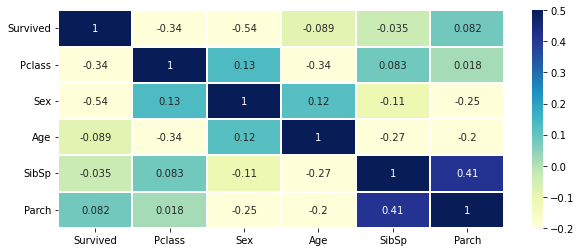

In [21]:
corrmatrix=df.corr()
corrmatrix
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,vmin=-.2,vmax=.5,annot=True,linewidth=0.2,cmap='YlGnBu')

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(df)

In [23]:
X

array([[-0.78927234,  0.82737724,  0.73769513, -0.58438725,  0.43279337,
        -0.47367361],
       [ 1.2669898 , -1.56610693, -1.35557354,  0.62136484,  0.43279337,
        -0.47367361],
       [ 1.2669898 ,  0.82737724, -1.35557354, -0.28294923, -0.4745452 ,
        -0.47367361],
       ...,
       [-0.78927234,  0.82737724, -1.35557354, -0.60142056,  0.43279337,
         2.00893337],
       [ 1.2669898 , -1.56610693,  0.73769513, -0.28294923, -0.4745452 ,
        -0.47367361],
       [-0.78927234,  0.82737724,  0.73769513,  0.1692078 , -0.4745452 ,
        -0.47367361]])

In [24]:
pd.DataFrame(X)

,0,1,2,3,4,5
0,-0.789272,0.827377,0.737695,-0.584387,0.432793,-0.473674
1,1.266990,-1.566107,-1.355574,0.621365,0.432793,-0.473674
2,1.266990,0.827377,-1.355574,-0.282949,-0.474545,-0.473674
3,1.266990,-1.566107,-1.355574,0.395286,0.432793,-0.473674
4,-0.789272,0.827377,0.737695,0.395286,-0.474545,-0.473674
...,...,...,...,...,...,...
886,-0.789272,-0.369365,0.737695,-0.207590,-0.474545,-0.473674
887,1.266990,-1.566107,-1.355574,-0.810466,-0.474545,-0.473674
888,-0.789272,0.827377,-1.355574,-0.601421,0.432793,2.008933
889,1.266990,-1.566107,0.737695,-0.282949,-0.474545,-0.473674


In [25]:
X=df.drop(['Survived'],axis=1)
y=(df['Survived'])

In [26]:
#spliting of data
from  sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
X_train.shape

(712, 5)

In [28]:
X_test.shape

(179, 5)

# Naive Bayes classifier on the data set

In [29]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()
NB.fit(X_train,y_train)
y_pre=NB.predict(X_test)

In [30]:
y_pre

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix(y_test,y_pre)

array([[81, 24],
       [20, 54]], dtype=int64)

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score,plot_confusion_matrix
print('Accuracy is:', accuracy_score(y_test, y_pre))
print('f1_score is:', f1_score(y_test, y_pre, average = 'macro'))
print("Precision score :",precision_score(y_test,y_pre,average='macro'))
print("Recall_score :",recall_score(y_test,y_pre,average='macro'))

Accuracy is: 0.7541899441340782
f1_score is: 0.7484670413898824
Precision score : 0.7471439451637472
Recall_score : 0.7505791505791506


# Hyperparameter tuning

In [33]:
print(NB.get_params())

{'priors': None, 'var_smoothing': 1e-09}


In [34]:
# Using GridSearchCV to find the optimum parameters
import numpy as np
from sklearn.model_selection import GridSearchCV
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
NB_grid = GridSearchCV(estimator=GaussianNB(), 
                 param_grid=params_NB, 
                 cv=10,   
                 verbose=1, 
                 scoring='accuracy') 
NB_grid.fit(X_train, y_train)
print(NB_grid.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
{'var_smoothing': 0.003511191734215131}


In [35]:
y_pre=NB_grid.best_estimator_.predict(X_test)

In [36]:
print('Accuracy is:', accuracy_score(y_test, y_pre))
print('f1_score is:', f1_score(y_test, y_pre, average = 'macro'))
print("Precision score :",precision_score(y_test,y_pre,average='macro'))
print("Recall_score :",recall_score(y_test,y_pre,average='macro'))

Accuracy is: 0.7430167597765364
f1_score is: 0.7256796375266524
Precision score : 0.7406162464985995
Recall_score : 0.7211068211068211


In [37]:
confusion_matrix(y_test,y_pre)

array([[89, 16],
       [30, 44]], dtype=int64)

There is no much difference in the model after Hyperparameter tuning